#Classify Movies Reviews for The IMDB dataset:
- สร้าง Model เกี่ยวกับการจำแนกข้อมูล review เกี่ยวกับ Internet Movies ว่ามีความพึงพอใจหรือไม่พึงพอใจ ซึ่งจะมีทั้งหมด 50,000 ตัวอย่าง (training examples – 25,000 ตัวอย่าง, test example – 25,000 ตัวอย่าง ข้อมูล train_labels และ test_labels มีค่า 0 และ 1 โดย 0 หมายถึง “negative” และ 1 หมายถึง“ positive”

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout

##Data Collection
ทำการโหลด dataset ที่ Keras เตรียมมาให้ โดยกำหนด num_words = 10000 (เลือกคำที่ปรากฎบ่อยที่สุด 10000 คำ มาทำเป็น input features) 

In [ ]:
(X, y), (Xtest, ytest) = tf.keras.datasets.imdb.load_data(num_words=10000)
tf.keras.datasets.mnist

17473536/17464789 [==============================] - 0s 0us/step


<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

##Data Exploratoin and Preparation

In [ ]:
# print the shape of training examples and its label
print(X.shape) # 25,000 reviews for training 
print(Xtest.shape) # 25,000 reviews for testing

# explore the first features of training examples
print(X[0]) # each review is a list of sequence of words encoded with a number in a range of 0-9999)
# check the maximum number in a range (each number stands for a specific word in a dictionary(top 10000 words)) 
# max([max(sequence) for sequence in X]) # 9999

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# print the shape of training examples and its label
print(y.shape) 
print(ytest.shape)

# explore the first target feature of some training examples
print(y[0])

# print the propotion of positive reviews in training and test set 
print("Percentage of positve class in training set",np.sum(y == 1)/y.shape[0]*100)
print("Percentage of positve class in test set",np.sum(y == 1)/y.shape[0]*100)

(25000,)
(25000,)
1
Percentage of positve class in training set 50.0
Percentage of positve class in test set 50.0


In [ ]:
# Code ต่อไปนี้ใช้สำหรับการ decode ตัวเลขกลับไปเป็นตัวอักษร  
word_index = tf.keras.datasets.imdb.get_word_index()
print("word to integer",word_index)
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
print("integer to word", reverse_word_index)


1654784/1641221 [==============================] - 0s 0us/step


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# จาก code ในการ decode ลองใช้ code ดังกล่าวในการดู review แรกของ training set 
# i-3 เพราะ ตัวเลขที่เก็บอยู่ใน review ถูก index เพิ่มขึ้นไป 3 จากการมี reserved words ใน 3 ตัวเลขแรก ( “padding,” “start of sequence,” and “unknown.”)
# ยกตัวอย่างเช่นคำว่า this ใน review จะเก็บเป็นเลข 14 แต่ถ้ามาตรวจสอบกับ word_index.get("this") จะตรงกับคำว่า 11 (ต้องหักจากตัวเลขใน review ไป 3)
decoded_review = " ".join([reverse_word_index.get(i-3, '?') for i in X[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# แปลงทุก review ให้อยู่ในรูปแบบของการมี input feature เดียวกัน 
# ทำได้โดยการแปลงแต่ละ training example ให้อยู่ในรูป one hot vectors of 10,000-dimensional vector 

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  #print(results.shape)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

X = vectorize_sequences(X)
Xtest = vectorize_sequences(Xtest)

#y_train = np.asarray(y_train_full).astype('float32')
#y_test = np.asarray(y_test).astype('float32')

X[0]

array([0., 1., 1., ..., 0., 0., 0.])

# Modelling

(2) ทำการเขียน code เพื่อ สร้างและ train model ที่เป็น 3-Layers NN architecture model 

1.   Build model โดยกำหนด hidden layer ที่ 1 = 16 nodes, hidden layer ที่ 2 = 16 nodes และ output layer = 1 node (for binary classification), activations ใน hidden layer ใช้เป็น relu และ  activations ใน hidden layer ใช้เป็น sigmoid 
2.   Compile model โดยกำหนด optimzer เป็น Adam, loss เป็น binary_crossentropy และ metrics เป็น accuracy
3.   Train model โดยเรียก fit() method ที่ใช้ epochs 20 รอบ, batch size = 512 โดยให้ train โดยแบ่งข้อมูลให้ validation set 40% ด้วย 




In [ ]:
tf.random.set_seed(42)

# build the model
model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# train the model with validation set (proportion of training set: validation set = 60:40), epochs -20, and batch size = 512
history = model.fit(X, y,epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5467 - accuracy: 0.7663 - val_loss: 0.3933 - val_accuracy: 0.8604
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2952 - accuracy: 0.9032 - val_loss: 0.2920 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1997 - accuracy: 0.9359 - val_loss: 0.2781 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1502 - accuracy: 0.9529 - val_loss: 0.2888 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1159 - accuracy: 0.9677 - val_loss: 0.2960 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0887 - accuracy: 0.9771 - val_loss: 0.3187 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0695 - accuracy: 0.9845 - val_loss: 0.3517 - val_accuracy: 0.8783
Epoch 8/20
30

#Model Evaluation

In [ ]:
# checking loss and accuracy metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

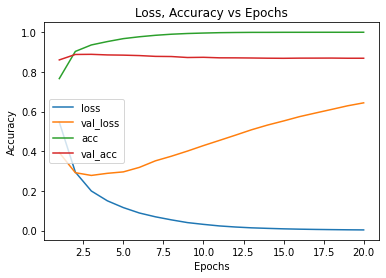

In [ ]:
#plot the learning curves
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.plot(epochs, history.history['accuracy'], label = 'acc')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_acc')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

เขียน code ในการวัดประสิทธิภาพ(evaluate) ของ model กับ test set 

In [ ]:
model.evaluate(Xtest, ytest)

782/782 [==============================] - 1s 2ms/step - loss: 0.7014 - accuracy: 0.8545


[0.7014392018318176, 0.8545200228691101]

In [ ]:
#prediction
np.argmax(model.predict(Xtest[0:10,:]), axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
ytest[0:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

#Improvement

จากกราฟ Loss, Accuracy vs epochs ให้นิสิตลองปรับปรุง Model ด้วย regularization และ dropout ที่ควรให้ผลลัพธ์ที่ลด overfitting ได้ จากนั้นทำการวัด preformance ของ model ที่ได้ปรับปรุงกับ Test set และลองทำนายข้อมูลตัวอย่างแรกใน test set เทียบกับข้อมูลจริงดู 

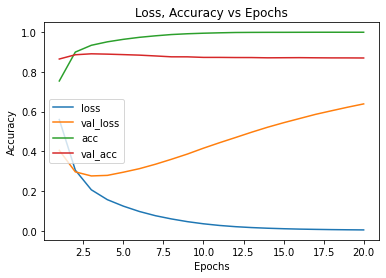

#Hyperparameter Tuning

In [ ]:
! pip install keras-tuner 

     |████████████████████████████████| 97 kB 5.2 MB/s 


In [ ]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner
import kerastuner as kt
kt.__version__

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


'1.0.3'

# Built model for tuning

In [ ]:
tf.random.set_seed(42)

def build_model(hp):
    '''
    Builds model and sets up hyperparameter space to search.
    
    Parameters
    ----------
    hp : HyperParameter object
        Configures hyperparameters to tune.
        
    Returns
    -------
    model : keras model
        Compiled model with hyperparameters to tune.
    '''
    # build the model
    model = models.Sequential()
    Flatten(input_shape=(X.shape[1:],))
    for i in range(hp.Int("num_layers", 1, 5)):
      model.add(Dense(units=hp.Int("units_" + str(i), min_value=16, max_value=100, step=1), activation=hp.Choice("activation", values=['relu', 'elu', 'selu'])))
      model.add(Dropout(hp.Float("dropout_" + str(i), 0, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    #  
    # compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float("lr", 1e-4, 1e-2, sampling ='log')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

#Randomized Search

In [ ]:
### Fill your code###

# Hyperband

In [ ]:
### Fill your code###